<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER4%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 분류(classification)의 개요**

앙상블을 주로 다루는 챕터입니다. 앙상블은 정형 데이터의 예측 분석 영역에서 매우 좋은 예측 성능을 발휘합니다. 대부분 동일한 알고리즘을 결합하며, 기본 알고리즘으로 사용하는 것은 결정 트리입니다.

# **2. 결정 트리**

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듭니다. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측합니다. 쉽게 예측할 수 있는 조건을 찾아서 분류하는 것이 가장 효율적이기 때문입니다.

이러한 정보 균일도를 측정하는 대표적 방법은 엔트로피를 이용한 **정보 이득(Information Gain)**과 지니계수입니다.

정보 이득은 **엔트로피(주어진 데이터 집합의 혼잡도)**를 기반으로 합니다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값입니다. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니다. 

지니 계수는 경제학에서 불평등 지수를 나타내는 데 쓰이는 지수입니다. 머신러닝에서는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석하고, 지니 계수가 낮은 속성을 기준으로 분할합니다. 다시 말하면, 데이터 세트를 분할하는 데 가장 좋은 조건은 정보 이득이 높거나 지니 계수가 낮은 조건입니다. `DecisionTreeClassifier` 클래스는 기본적으로 지니 계수를 이용하여 데이터를 분할합니다. 

## **2.1. 결정 트리 모델의 특징**

결정 트리는 정보 균일도가 기반이므로 쉽고 직관적입니다. 대부분의 경우 피처 스케일링과 정규화 같은 전처리 작업도 불필요합니다. 다만 과적합되기 쉬우므로 트리 크기를 제한하면서 성능을 튜닝하는 편이 좋습니다.

## **2.2. 결정 트리 파라미터**

- `min_samples_split`: 노드를 분할하기 위한 최소한의 샘플 데이터 수를 지정하는 파라미터(매개변수)입니다. 과적합 제어에 사용하며, 디폴트는 `2`이고, 작게 지정할수록 분할되는 노드가 많아져서 과적합되기 쉽습니다. 

- `min_samples_leaf`: 리프 노드가 되기 위한 최소한의 샘플 데이터 수를 지정하는 파라미터입니다. 과적합 제어에 사용하며, 비대칭적인 데이터의 경우 특정 클래스의 데이터가 작을 수 있으므로 숫자를 작게 지정할 필요가 있습니다. 

- `max_features`: 최적 분할을 위해 고려할 최대 피처 개수를 지정하는 파라미터입니다. 디폴트는 `None`이며 모든 피처를 사용하여 분할합니다. `int`는 대상 피처의 개수, `float`는 전체 피처 중 대상 피처의 퍼센트, `sqrt`는 $\sqrt{전체 피처 개수}$, `auto`는 `sqrt`와 동일하고, `log`는 전체 피처 중 $log2(전체 피처 개수)$입니다.

- `max_depth`: 트리의 최대 깊이를 지정하는 매개변수입니다. 디폴트는 `None`이며 클래스 결정값이 될 때까지 깊이를 키워서 분할하거나 노드가 가지는 데이터 수가 `min_samples_leaf`보다 작아질 때까지 깊이를 키웁니다.

- `max_leaf_nodes`: 리프 노드의 최대 개수를 지정하는 파라미터입니다.

## **2.3. 결정 트리 모델의 시각화**

붓꽃 데이터 세트를 시각화해보겠습니다. 먼저 학습을 수행합니다.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

`export_graphviz()` 메서드를 호출하여 그래프로 시각화할 출력 파일을 생성하겠습니다.

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

`graphviz` 패키지를 사용하여 결정 트리를 시각화하겠습니다.

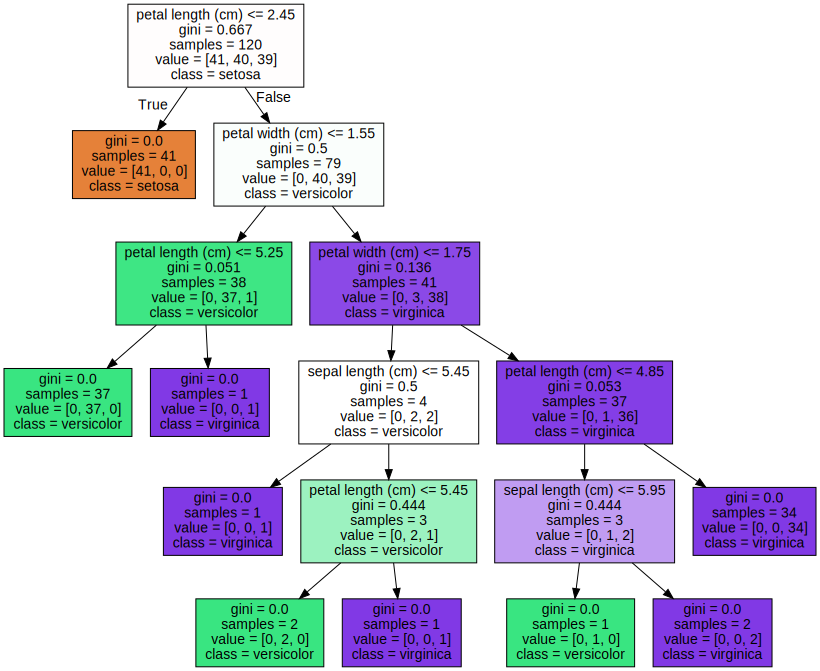

In [7]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

피처 중요도를 출력해보겠습니다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


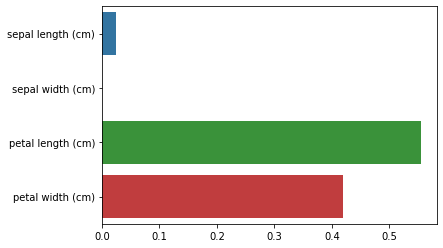

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('Feature importances:\n{}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{}: {:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()

## **2.4. 결정 트리 과적합(overfitting)**



---

휴식 중

---



## **2.5. 결정 트리 실습 - 사용자 행동 인식 데이터 세트**

# **3. 앙상블 학습**

## **3.1. 앙상블 학습 개요**

## **3.2. 보팅 유형 - 하드 보팅(hard voting)과 소프트 보팅(soft voting)**

## **3.3. 보팅 분류기(voting classifier)**

# **4. 랜덤 포레스트**

## **4.1. 랜덤 포레스트 개요 및 실습**

## **4.2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝**

# **5. GBM(Gradient Boosting Machine)**

## **5.1. GBM의 개요 및 실습**

## **5.2. GBM 하이퍼 파라미터 및 튜닝**

# **6. XGBoost(eXtra Gradient Boost)**

## **6.1. XGBoost 개요**

## **6.2. XGBoost 설치하기**

## **6.3. 파이썬 래퍼 XGBoost 하이퍼 파라미터**

## **6.4. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

## **6.5. 사이킷런 래퍼 XGBoost의 개요 및 적용**

# **7. LightGBM**

## **7.1. LightGBM 설치**

## **7.2. LightGBM 하이퍼 파라미터**

## **7.3. 하이퍼 파라미터 튜닝 방안**

## **7.4. 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교**

## **7.5. LightGBM 적용 - 위스콘신 유방암 예측**

# **8. 분류 실습 - 캐글 산탄데르 고객 만족 예측**

## **8.1. 데이터 전처리**

## **8.2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

## **8.3. LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

# **9. 분류 실습 - 캐글 신용카드 사기 검출**

## **9.1. 언더 샘플링과 오버 샘플링의 이해**

## **9.2. 데이터 일차 가공 및 모델 학습/예측/평가**

## **9.3. 데이터 분포도 변환 후 모델 학습/예측 평가**

## **9.4. 이상치 데이터 제거 후 모델 학습/예측/평가**

## **9.5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

# **10. 스태킹 앙상블**

## **10.1. 기본 스태킹 모델**

## **10.2. CV 세트 기반의 스태킹**

# **11. 정리**